<a href="https://colab.research.google.com/github/ruchitha11n/data-science-ExcelR/blob/main/Association_Rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Install required library (if not already installed)
!pip install mlxtend

In [ ]:
# STEP 2: Import libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# STEP 3: Load the dataset
df = pd.read_excel('/content/Online retail.xlsx')


In [ ]:

# STEP 4: Parse transactions (split by commas)
transactions = df.iloc[:, 0].dropna().apply(lambda x: x.split(','))

In [ ]:

# STEP 5: One-hot encode the transaction list
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

In [ ]:
# STEP 6: Run Apriori and generate rules at different thresholds
settings = [(0.2, 0.6), (0.15, 0.5), (0.1, 0.4), (0.05, 0.3)]
rules_list = []

In [ ]:

for support, confidence in settings:
    print(f"\nRunning Apriori with min_support={support}, min_confidence={confidence}")
    frequent_items = apriori(df_encoded, min_support=support, use_colnames=True)
    rules = association_rules(frequent_items, metric="confidence", min_threshold=confidence)
    print(f"Rules found: {len(rules)}")
    rules['support_level'] = support
    rules['confidence_level'] = confidence
    rules_list.append(rules)


Running Apriori with min_support=0.2, min_confidence=0.6
Rules found: 0

Running Apriori with min_support=0.15, min_confidence=0.5
Rules found: 0

Running Apriori with min_support=0.1, min_confidence=0.4
Rules found: 0

Running Apriori with min_support=0.05, min_confidence=0.3
Rules found: 2


In [ ]:

# STEP 7: Combine and visualize rule counts
all_rules = pd.concat(rules_list, ignore_index=True)

<ipython-input-19-5b0f372d990b>:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_rules = pd.concat(rules_list, ignore_index=True)


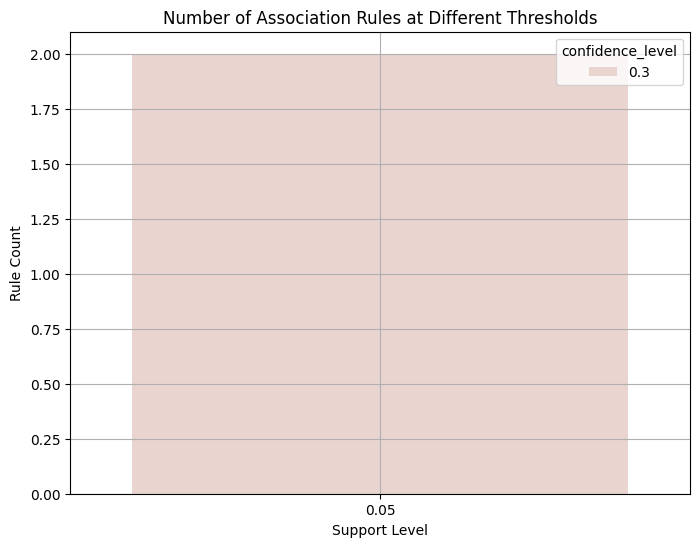

In [ ]:
# Bar plot of number of rules
summary = all_rules.groupby(['support_level', 'confidence_level']).size().reset_index(name='rule_count')
plt.figure(figsize=(8,6))
sns.barplot(data=summary, x='support_level', y='rule_count', hue='confidence_level')
plt.title("Number of Association Rules at Different Thresholds")
plt.xlabel("Support Level")
plt.ylabel("Rule Count")
plt.grid(True)
plt.show()

In [ ]:
# Combine results
all_rules = pd.concat(rules_list, ignore_index=True)

<ipython-input-21-b8c56b19eb00>:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_rules = pd.concat(rules_list, ignore_index=True)


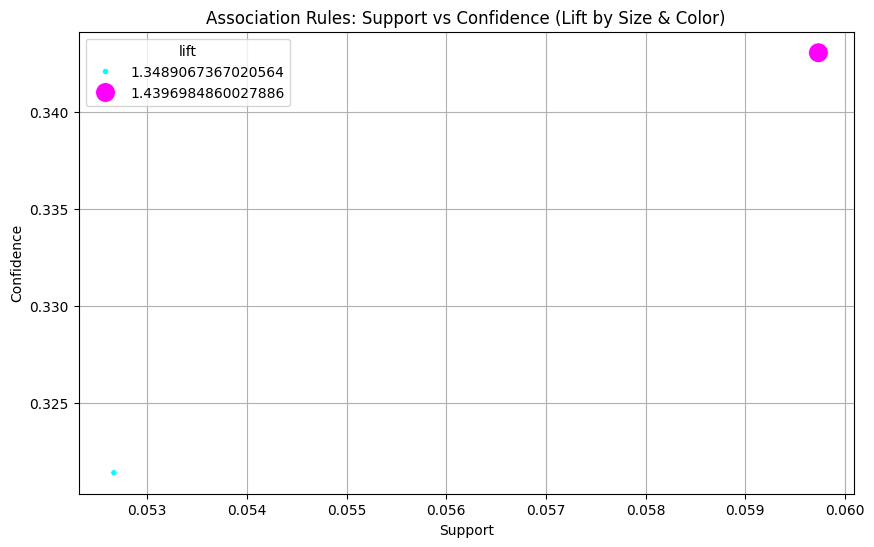

In [ ]:
# STEP 8: Visualize lift vs confidence
plt.figure(figsize=(10,6))
sns.scatterplot(data=all_rules, x='support', y='confidence', size='lift', hue='lift', sizes=(20, 200), palette='cool')
plt.title("Association Rules: Support vs Confidence (Lift by Size & Color)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.grid(True)
plt.show()

In [ ]:
# STEP 9: Display Top 5 Rules by Lift
top_rules = all_rules.sort_values(by='lift', ascending=False).head(5)
print("\nTop 5 Rules by Lift:")
display(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top 5 Rules by Lift:


,antecedents,consequents,support,confidence,lift
1,(spaghetti),(mineral water),0.059733,0.343032,1.439698
0,(chocolate),(mineral water),0.052667,0.321400,1.348907


**1. What is lift and why is it important in association rules?**


Lift tells us how much more likely two items are bought together compared to just by chance. If the lift value is more than 1, it means there’s a strong relationship between the items. It's important because it helps us find meaningful patterns that are not just random.

**2.What is support and confidence? How do you calculate them?**


Support shows how often an item or group of items appears in the dataset.

Confidence tells us how often one item is bought when another item is already bought. These values help us choose the most useful and reliable rules from the data.

**3. What are some limitations or challenges of Association Rule Mining?**


It can create too many rules, which can be overwhelming.

Some rules may not be useful or interesting.

It does not show cause-and-effect, just patterns.

It can be slow or use a lot of memory on large datasets.

You need to choose good minimum values for support and confidence to get better results.